In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("deliveries.csv")
df.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

### Analysis of performance of V Kohli

In [3]:
filt=df['batsman']=='V Kohli'
df_kohli=df[filt]
df_kohli.shape

(3494, 21)

<AxesSubplot:ylabel='dismissal_kind'>

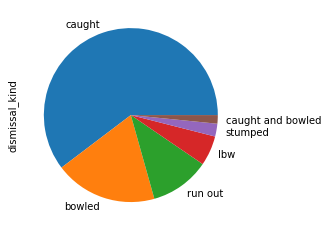

In [4]:
df_kohli['dismissal_kind'].value_counts().plot.pie()

In [5]:
len(df_kohli[df_kohli['batsman_runs']==4])

384

In [6]:
def count(df,runs):
    return len(df_kohli[df_kohli['batsman_runs']==runs])*runs

In [7]:
count(df_kohli,1)

1410

In [8]:
count(df_kohli,2)

484

In [9]:
count(df_kohli,3)

33

In [10]:
count(df_kohli,4)

1536

In [11]:
count(df_kohli,6)

960

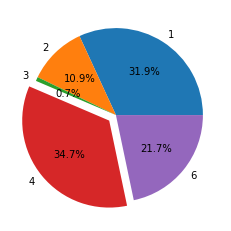

In [12]:
##Runs scored by Kohli.
slices=[1410,484,33,1536,960]
labels=[1,2,3,4,6]
explode=[0,0,0,0.1,0]
plt.pie(slices,labels=labels,autopct='%1.1f%%',explode=explode)
plt.show()

### Runs scored by teams in both innings

In [13]:
df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants'], dtype=object)

In [14]:
Teams={'Royal Challengers Bangalore':'RCB', 'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiant':'RPS', 'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 'Gujarat Lions':'GL', 'Kings XI Punjab':'KXIP',
       'Delhi Daredevils':'DD', 'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR',
       'Deccan Chargers':'DC', 'Kochi Tuskers Kerala':'KTK', 'Pune Warriors':'PW',
       'Rising Pune Supergiants':'RPS'
      }

In [15]:
df['batting_team']=df['batting_team'].map(Teams)
df['bowling_team']=df['bowling_team'].map(Teams)

In [16]:
df.head()

match_id  inning batting_team bowling_team  over  ball    batsman  \
0         1       1          SRH          RCB     1     1  DA Warner   
1         1       1          SRH          RCB     1     2  DA Warner   
2         1       1          SRH          RCB     1     3  DA Warner   
3         1       1          SRH          RCB     1     4  DA Warner   
4         1       1          SRH          RCB     1     5  DA Warner   

  non_striker    bowler  is_super_over  ...  bye_runs  legbye_runs  \
0    S Dhawan  TS Mills              0  ...         0            0   
1    S Dhawan  TS Mills              0  ...         0            0   
2    S Dhawan  TS Mills              0  ...         0            0   
3    S Dhawan  TS Mills              0  ...         0            0   
4    S Dhawan  TS Mills              0  ...         0            0   

   noball_runs  penalty_runs  batsman_runs  extra_runs  total_runs  \
0            0             0             0           0           0   
1            0             0             0           0           0   
2            0             0             4           0           4   
3            0             0             0           0           0   
4            0             0             0           2           2   

   player_dismissed dismissal_kind fielder  
0               NaN            NaN     NaN  
1               NaN            NaN     NaN  
2               NaN            NaN     NaN  
3               NaN            NaN     NaN  
4               NaN            NaN     NaN  

[5 rows x 21 columns]

In [17]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [18]:
runs=df.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
runs.drop('match_id',axis=1,inplace=True)
runs

inning batting_team  total_runs
0          1          SRH         207
1          2          RCB         172
2          1           MI         184
3          2          RPS         187
4          1           GL         183
...      ...          ...         ...
1279       2          KKR         140
1280       1           GL         162
1281       2          SRH         163
1282       1          SRH         208
1283       2          RCB         200

[1284 rows x 3 columns]

In [19]:
inning1=runs[runs['inning']==1]
inning2=runs[runs['inning']==2]

<AxesSubplot:xlabel='batting_team', ylabel='total_runs'>

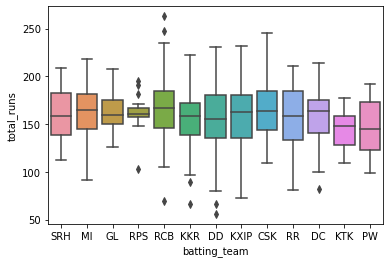

In [20]:
sns.boxplot(x='batting_team',y='total_runs',data=inning1)

<AxesSubplot:xlabel='batting_team', ylabel='total_runs'>

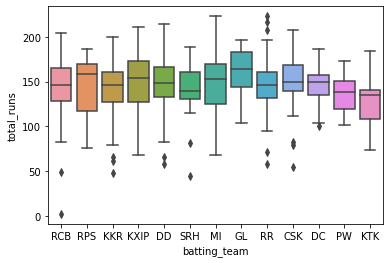

In [21]:
sns.boxplot(x='batting_team',y='total_runs',data=inning2)

### Number of times a team scored more than 200

In [22]:
high_scores=df.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_scores

match_id  inning batting_team bowling_team  total_runs
0            1       1          SRH          RCB         207
1            1       2          RCB          SRH         172
2            2       1           MI          RPS         184
3            2       2          RPS           MI         187
4            3       1           GL          KKR         183
...        ...     ...          ...          ...         ...
1279       634       2          KKR          SRH         140
1280       635       1           GL          SRH         162
1281       635       2          SRH           GL         163
1282       636       1          SRH          RCB         208
1283       636       2          RCB          SRH         200

[1284 rows x 5 columns]

In [23]:
score_200=high_scores[high_scores['total_runs']>=200]
score_200

match_id  inning batting_team bowling_team  total_runs
0            1       1          SRH          RCB         207
16           9       1           DD          RPS         205
38          20       1          RCB           GL         213
62          32       1          SRH         KXIP         207
72          36       1          SRH          KKR         209
...        ...     ...          ...          ...         ...
1250       620       1          RCB           GL         248
1256       623       1           MI           DD         206
1262       626       1          RCB         KXIP         211
1282       636       1          SRH          RCB         208
1283       636       2          RCB          SRH         200

[67 rows x 5 columns]

C:\Users\SACHIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='batting_team', ylabel='count'>

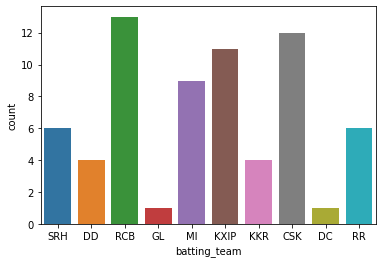

In [24]:
sns.countplot(score_200['batting_team'])

C:\Users\SACHIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bowling_team', ylabel='count'>

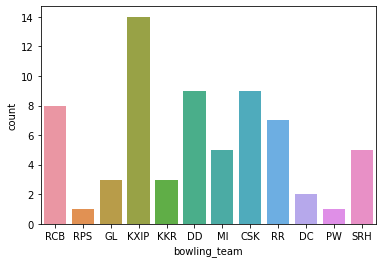

In [25]:
sns.countplot(score_200['bowling_team'])

### Strike Rate of each batsman

In [26]:
balls=df.groupby('batsman')['ball'].count().reset_index()
balls

batsman  ball
0    A Ashish Reddy   196
1        A Chandila     7
2          A Chopra    75
3       A Choudhary    20
4        A Flintoff    57
..              ...   ...
456     YV Takawale   183
457   Yashpal Singh    67
458     Younis Khan     7
459    Yuvraj Singh  2050
460          Z Khan   141

[461 rows x 2 columns]

In [27]:
runs=df.groupby('batsman')['batsman_runs'].sum().reset_index()
runs

batsman  batsman_runs
0    A Ashish Reddy           280
1        A Chandila             4
2          A Chopra            53
3       A Choudhary            25
4        A Flintoff            62
..              ...           ...
456     YV Takawale           192
457   Yashpal Singh            47
458     Younis Khan             3
459    Yuvraj Singh          2591
460          Z Khan           117

[461 rows x 2 columns]

In [28]:
four=df[df['batsman_runs']==4]
four

match_id  inning batting_team bowling_team  over  ball        batsman  \
2              1       1          SRH          RCB     1     3      DA Warner   
8              1       1          SRH          RCB     2     2      DA Warner   
13             1       1          SRH          RCB     2     7   MC Henriques   
30             1       1          SRH          RCB     5     5   MC Henriques   
32             1       1          SRH          RCB     6     1       S Dhawan   
...          ...     ...          ...          ...   ...   ...            ...   
150403       636       2          RCB          SRH    11     4        V Kohli   
150407       636       2          RCB          SRH    12     2        V Kohli   
150418       636       2          RCB          SRH    14     1       KL Rahul   
150447       636       2          RCB          SRH    18     6    Sachin Baby   
150459       636       2          RCB          SRH    20     6  Iqbal Abdulla   

           non_striker        bowler  is_super_over  ...  bye_runs  \
2             S Dhawan      TS Mills              0  ...         0   
8             S Dhawan   A Choudhary              0  ...         0   
13            S Dhawan   A Choudhary              0  ...         0   
30            S Dhawan     S Aravind              0  ...         0   
32        MC Henriques     SR Watson              0  ...         0   
...                ...           ...            ...  ...       ...   
150403  AB de Villiers   BCJ Cutting              0  ...         0   
150407  AB de Villiers  Bipul Sharma              0  ...         0   
150418  AB de Villiers  Bipul Sharma              0  ...         0   
150447       STR Binny       B Kumar              0  ...         0   
150459     Sachin Baby       B Kumar              0  ...         0   

        legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
2                 0            0             0             4           0   
8                 0            0             0             4           0   
13                0            0             0             4           0   
30                0            0             0             4           0   
32                0            0             0             4           0   
...             ...          ...           ...           ...         ...   
150403            0            0             0             4           0   
150407            0            0             0             4           0   
150418            0            0             0             4           0   
150447            0            0             0             4           0   
150459            0            0             0             4           0   

        total_runs  player_dismissed dismissal_kind fielder  
2                4               NaN            NaN     NaN  
8                4               NaN            NaN     NaN  
13               4               NaN            NaN     NaN  
30               4               NaN            NaN     NaN  
32               4               NaN            NaN     NaN  
...            ...               ...            ...     ...  
150403           4               NaN            NaN     NaN  
150407           4               NaN            NaN     NaN  
150418           4               NaN            NaN     NaN  
150447           4               NaN            NaN     NaN  
150459           4               NaN            NaN     NaN  

[17033 rows x 21 columns]

In [29]:
runs_4=four.groupby('batsman')['batsman_runs'].count().reset_index()
runs_4.columns=['batsman','4s']
runs_4

batsman   4s
0    A Ashish Reddy   16
1          A Chopra    7
2       A Choudhary    1
3        A Flintoff    5
4          A Kumble    3
..              ...  ...
363       YK Pathan  240
364     YV Takawale   26
365   Yashpal Singh    5
366    Yuvraj Singh  205
367          Z Khan   11

[368 rows x 2 columns]

In [30]:
six=df[df['batsman_runs']==6]
runs_6=six.groupby('batsman')['batsman_runs'].count().reset_index()
runs_6.columns=['batsman','6s']
runs_6

batsman   6s
0     A Ashish Reddy   15
1        A Choudhary    1
2         A Flintoff    2
3           A Mishra    5
4           A Mithun    1
..               ...  ...
296  Y Venugopal Rao   37
297        YK Pathan  149
298      YV Takawale    3
299     Yuvraj Singh  141
300           Z Khan    2

[301 rows x 2 columns]

In [31]:
players1=pd.merge(runs,balls,on='batsman',how='outer')
players2=pd.merge(players1,runs_4,on='batsman',how='outer')
players=pd.merge(players2,runs_6,on='batsman',how='outer')
players

batsman  batsman_runs  ball     4s     6s
0    A Ashish Reddy           280   196   16.0   15.0
1        A Chandila             4     7    NaN    NaN
2          A Chopra            53    75    7.0    NaN
3       A Choudhary            25    20    1.0    1.0
4        A Flintoff            62    57    5.0    2.0
..              ...           ...   ...    ...    ...
456     YV Takawale           192   183   26.0    3.0
457   Yashpal Singh            47    67    5.0    NaN
458     Younis Khan             3     7    NaN    NaN
459    Yuvraj Singh          2591  2050  205.0  141.0
460          Z Khan           117   141   11.0    2.0

[461 rows x 5 columns]

In [32]:
players.fillna(0,inplace=True)
players

batsman  batsman_runs  ball     4s     6s
0    A Ashish Reddy           280   196   16.0   15.0
1        A Chandila             4     7    0.0    0.0
2          A Chopra            53    75    7.0    0.0
3       A Choudhary            25    20    1.0    1.0
4        A Flintoff            62    57    5.0    2.0
..              ...           ...   ...    ...    ...
456     YV Takawale           192   183   26.0    3.0
457   Yashpal Singh            47    67    5.0    0.0
458     Younis Khan             3     7    0.0    0.0
459    Yuvraj Singh          2591  2050  205.0  141.0
460          Z Khan           117   141   11.0    2.0

[461 rows x 5 columns]

In [33]:
players['strike_rate']=(players['batsman_runs']/players['ball'])*100
players

batsman  batsman_runs  ball     4s     6s  strike_rate
0    A Ashish Reddy           280   196   16.0   15.0   142.857143
1        A Chandila             4     7    0.0    0.0    57.142857
2          A Chopra            53    75    7.0    0.0    70.666667
3       A Choudhary            25    20    1.0    1.0   125.000000
4        A Flintoff            62    57    5.0    2.0   108.771930
..              ...           ...   ...    ...    ...          ...
456     YV Takawale           192   183   26.0    3.0   104.918033
457   Yashpal Singh            47    67    5.0    0.0    70.149254
458     Younis Khan             3     7    0.0    0.0    42.857143
459    Yuvraj Singh          2591  2050  205.0  141.0   126.390244
460          Z Khan           117   141   11.0    2.0    82.978723

[461 rows x 6 columns]

### Top 10 highest runs scorer.

In [34]:
grp=df.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index()
grp

match_id       batsman batting_team  batsman_runs
0            1   A Choudhary          RCB             6
1            1   BCJ Cutting          SRH            16
2            1      CH Gayle          RCB            32
3            1     DA Warner          SRH            14
4            1      DJ Hooda          SRH            16
...        ...           ...          ...           ...
9510       636     SR Watson          RCB            11
9511       636     STR Binny          RCB             9
9512       636   Sachin Baby          RCB            18
9513       636       V Kohli          RCB            54
9514       636  Yuvraj Singh          SRH            38

[9515 rows x 4 columns]

In [35]:
max_runs=grp.groupby('batsman')['batsman_runs'].max().reset_index()
max_runs.columns=['batsman','max_runs']
max_runs

batsman  max_runs
0    A Ashish Reddy        36
1        A Chandila         4
2          A Chopra        24
3       A Choudhary        15
4        A Flintoff        24
..              ...       ...
456     YV Takawale        45
457   Yashpal Singh        20
458     Younis Khan         3
459    Yuvraj Singh        83
460          Z Khan        23

[461 rows x 2 columns]

In [36]:
players2=pd.concat([players,max_runs.iloc[:,1]],axis=1)
players2

batsman  batsman_runs  ball     4s     6s  strike_rate  max_runs
0    A Ashish Reddy           280   196   16.0   15.0   142.857143        36
1        A Chandila             4     7    0.0    0.0    57.142857         4
2          A Chopra            53    75    7.0    0.0    70.666667        24
3       A Choudhary            25    20    1.0    1.0   125.000000        15
4        A Flintoff            62    57    5.0    2.0   108.771930        24
..              ...           ...   ...    ...    ...          ...       ...
456     YV Takawale           192   183   26.0    3.0   104.918033        45
457   Yashpal Singh            47    67    5.0    0.0    70.149254        20
458     Younis Khan             3     7    0.0    0.0    42.857143         3
459    Yuvraj Singh          2591  2050  205.0  141.0   126.390244        83
460          Z Khan           117   141   11.0    2.0    82.978723        23

[461 rows x 7 columns]

<AxesSubplot:xlabel='batsman'>

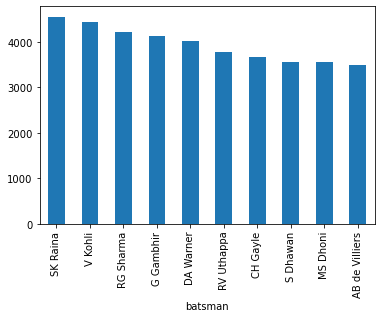

In [37]:
maximum_runs=players2.groupby('batsman')['batsman_runs'].sum()
maximum_runs.sort_values(ascending=False)[:10].plot(kind='bar')

### Hightest score in an inning by a batsman

In [38]:
df.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index().sort_values(by='batsman_runs',ascending=False).head(10)

match_id         batsman batting_team  batsman_runs
6200       411        CH Gayle          RCB           175
900         60     BB McCullum          KKR           158
8426       562  AB de Villiers          RCB           133
9257       620  AB de Villiers          RCB           129
5585       372        CH Gayle          RCB           128
3135       206         M Vijay          CSK           127
529         36       DA Warner          SRH           126
7752       516        V Sehwag         KXIP           122
3686       243     PC Valthaty         KXIP           120
4223       279        V Sehwag           DD           119

### Highest wicket taker in ipl

In [39]:
df['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [40]:
dismissal_kinds=['caught', 'bowled','lbw', 'caught and bowled','stumped', 'hit wicket']

In [41]:
hwt=df[df['dismissal_kind'].isin(dismissal_kinds)]
hwt.head()

match_id  inning batting_team bowling_team  over  ball        batsman  \
11          1       1          SRH          RCB     2     5      DA Warner   
64          1       1          SRH          RCB    11     3       S Dhawan   
94          1       1          SRH          RCB    16     2   MC Henriques   
116         1       1          SRH          RCB    19     4   Yuvraj Singh   
160         1       2          RCB          SRH     6     4  Mandeep Singh   

      non_striker       bowler  is_super_over  ...  bye_runs  legbye_runs  \
11       S Dhawan  A Choudhary              0  ...         0            0   
64   MC Henriques    STR Binny              0  ...         0            0   
94   Yuvraj Singh    YS Chahal              0  ...         0            0   
116      DJ Hooda     TS Mills              0  ...         0            0   
160      CH Gayle  Rashid Khan              0  ...         0            0   

     noball_runs  penalty_runs  batsman_runs  extra_runs  total_runs  \
11             0             0             0           0           0   
64             0             0             0           0           0   
94             0             0             0           0           0   
116            0             0             0           0           0   
160            0             0             0           0           0   

     player_dismissed dismissal_kind        fielder  
11          DA Warner         caught  Mandeep Singh  
64           S Dhawan         caught    Sachin Baby  
94       MC Henriques         caught    Sachin Baby  
116      Yuvraj Singh         bowled            NaN  
160     Mandeep Singh         bowled            NaN  

[5 rows x 21 columns]

<AxesSubplot:>

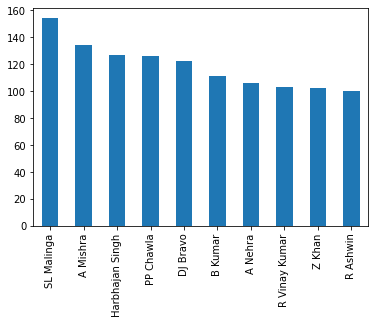

In [42]:
hwt['bowler'].value_counts()[:10].plot.bar()